# DNN : `Spam` dataset - version 0

## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

2025-01-21 09:32:45.639064: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-21 09:32:45.641162: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-21 09:32:45.647019: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-21 09:32:45.661387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737451965.692407 1421743 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737451965.69

## 1. Data

### 1.1. Import

In [2]:
# fold = '/Users/vincentlefieux/Dropbox/DocsACADEMIQUE/Data/'
# fold ="../data/" # Sur Onyxia et Google collab

# data = pd.read_csv(fold + 'spam.csv', header=0, sep=',', decimal='.')

url = 'https://archive.ics.uci.edu/static/public/94/data.csv'
data = pd.read_csv(url, header=0, sep=',', decimal='.')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [3]:
y = data['Class']
x = data.drop('Class', axis=1)

### 1.2. Train / validation / test split

In [4]:
x_train_valid, x_test, y_train_valid, y_test = train_test_split(x, y, test_size=1/5)

x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=1/5)

In [5]:
print('Dimensions of x_train :', x_train.shape)
print('Dimensions of x_valid :', x_valid.shape)
print('Dimensions of x_test  :', x_test.shape)
print('Dimensions of y_train :', y_train.shape)
print('Dimensions of y_valid :', y_valid.shape)
print('Dimensions of y_test  :', y_test.shape)

Dimensions of x_train : (2944, 57)
Dimensions of x_valid : (736, 57)
Dimensions of x_test  : (921, 57)
Dimensions of y_train : (2944,)
Dimensions of y_valid : (736,)
Dimensions of y_test  : (921,)


### 1.3. Normalization

In [6]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_norm = scaler.transform(x_train)
x_valid_norm = scaler.transform(x_valid)
x_test_norm  = scaler.transform(x_test)

## 2. DNN

### 2.1. Architecture

In [7]:
dim_inputs  = x_test_norm.shape[1]
dim_outputs = 1

neur_layer = 20

model = models.Sequential(name='DNN')

model.add(layers.Input((dim_inputs,), name='Inputs'))
model.add(layers.Dense(neur_layer, activation='relu', name='Hidden_layer'))
model.add(layers.Dense(dim_outputs, activation='sigmoid', name='Output_layer'))

2025-01-21 09:32:49.547698: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
model.summary()

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_layer (Dense)            │ (None, 20)             │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,181 (4.61 KB)

 Trainable params: 1,181 (4.61 KB)

 Non-trainable params: 0 (0.00 B)

### 2.2. Optimization

In [9]:
model.compile(optimizer = 'adam',
              loss      = 'binary_crossentropy',
              metrics   = ['accuracy'])

In [10]:
# Entraînement avec validation
history = model.fit(x_train_norm, y_train,
                    validation_data=(x_valid_norm, y_valid), # Données de validation
                    epochs=300,  # Nombre maximal d'epochs
                    batch_size=300,  # Taille du lot
                    verbose=0)

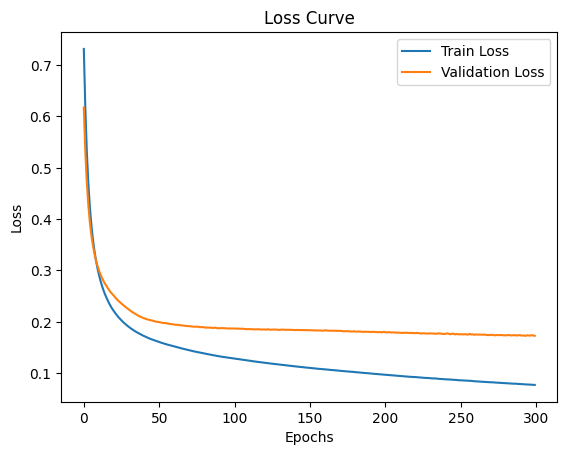

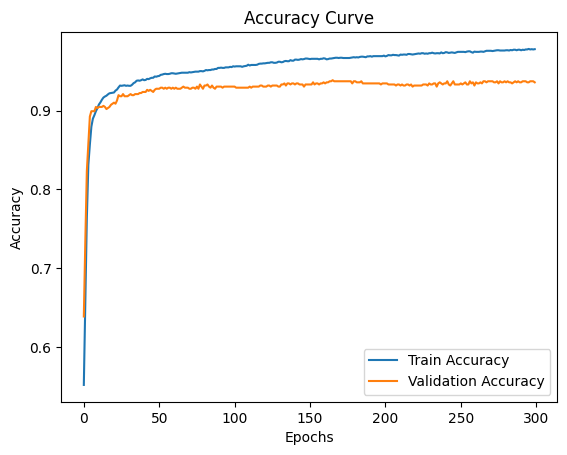

In [11]:
# Tracer la perte
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

# Tracer l'exactitude
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.show()


In [12]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9533 - loss: 0.1658
Test Loss: 0.172158882021904
Test Accuracy: 0.9500542879104614


#### Early stop pour éviter le sur apprentissage 

Nombre d'epochs optimal : 235
Meilleure epoch : 225
Meilleure perte de validation : 0.17678269743919373


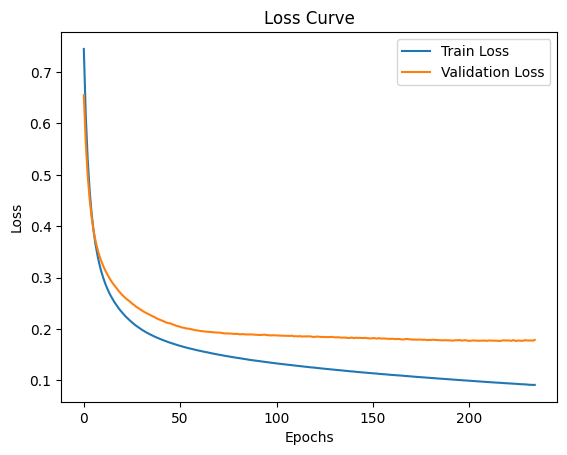

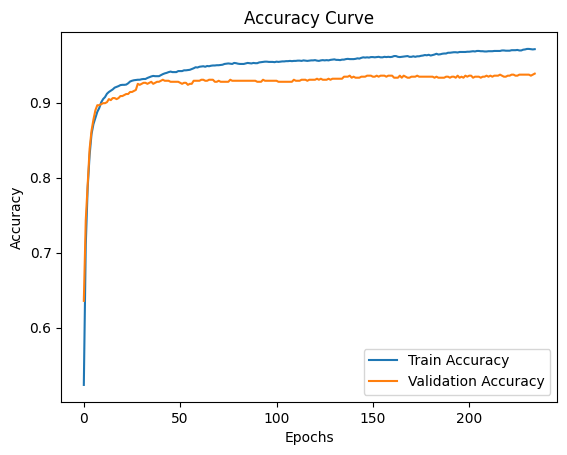

In [13]:
dim_inputs  = x_test_norm.shape[1]
dim_outputs = 1

neur_layer = 20

model = models.Sequential(name='DNN')

model.add(layers.Input((dim_inputs,), name='Inputs'))
model.add(layers.Dense(neur_layer, activation='relu', name='Hidden_layer'))
model.add(layers.Dense(dim_outputs, activation='sigmoid', name='Output_layer'))

model.compile(optimizer = 'adam',
              loss      = 'binary_crossentropy',
              metrics   = ['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(x_train_norm, y_train,
                    validation_data=(x_valid_norm, y_valid),
                    epochs=300,
                    batch_size=300,
                    callbacks=[early_stopping],
                    verbose=0)

# Nombre d'epochs optimal
optimal_epochs = len(history.history['loss'])
print(f"Nombre d'epochs optimal : {optimal_epochs}")

# Meilleure epoch
best_epoch = np.argmin(history.history['val_loss']) + 1  # Ajout de +1 car les epochs commencent à 1
print(f"Meilleure epoch : {best_epoch}")
print(f"Meilleure perte de validation : {min(history.history['val_loss'])}")

# Tracer la perte
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

# Tracer l'exactitude
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.show()


### 2.3 Changement d'architecture

Model: "DNN_with_Dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_layer_1 (Dense)          │ (None, 64)             │         3,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_3 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,337 (24.75 KB)

 Trainable params: 6,337 (24.75 KB)

 Non-trainable params: 0 (0.00 B)

Nombre d'epochs optimal : 75
Meilleure epoch : 65
Meilleure perte de validation : 0.1800951361656189


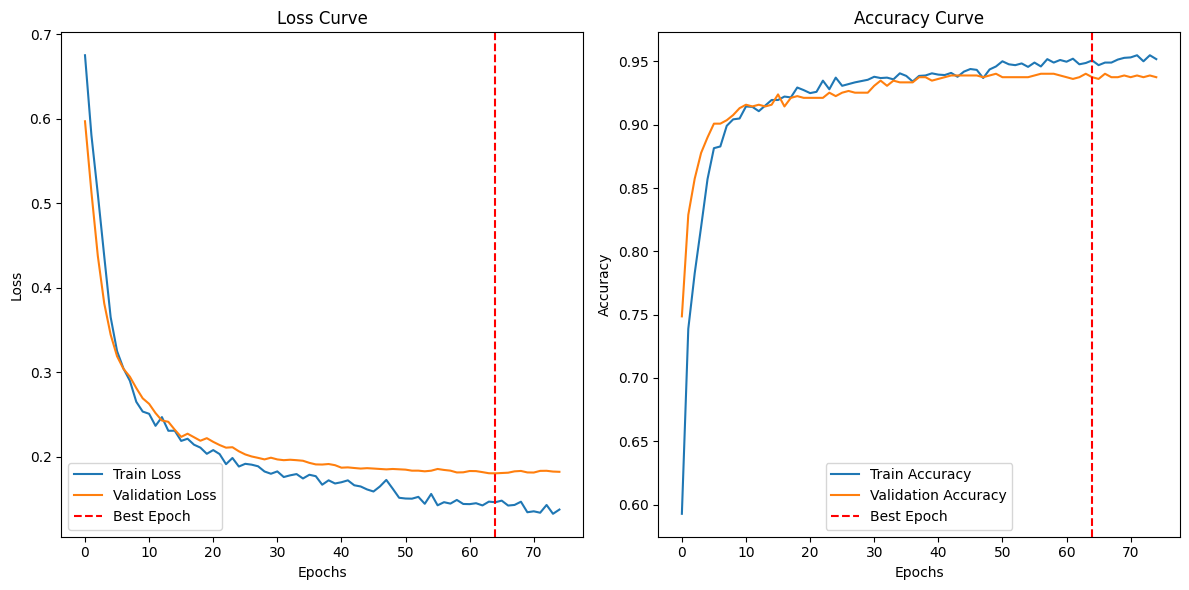

In [14]:
dim_inputs  = x_test_norm.shape[1]
dim_outputs = 1

model = models.Sequential(name='DNN_with_Dropout')

model.add(layers.Input((dim_inputs,), name='Inputs'))

# Couche 1
model.add(layers.Dense(64, activation='relu', name='Hidden_layer_1'))
model.add(layers.Dropout(0.5, name='Dropout_1'))  # Désactive 50% des neurones

# Couche 2
model.add(layers.Dense(32, activation='relu', name='Hidden_layer_2'))

# Couche 3
model.add(layers.Dense(16, activation='relu', name='Hidden_layer_3'))

# Couche de sortie
model.add(layers.Dense(dim_outputs, activation='sigmoid', name='Output_layer'))

model.summary()

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, restore_best_weights=True)

history = model.fit(x_train_norm, y_train,
                    validation_data=(x_valid_norm, y_valid),
                    epochs=300,
                    batch_size=256,
                    callbacks=[early_stopping],
                    verbose=0)

# Nombre d'epochs optimal
optimal_epochs = len(history.history['loss'])
print(f"Nombre d'epochs optimal : {optimal_epochs}")

# Meilleure epoch
best_epoch = np.argmin(history.history['val_loss']) + 1  # Ajout de +1 car les epochs commencent à 1
print(f"Meilleure epoch : {best_epoch}")
print(f"Meilleure perte de validation : {min(history.history['val_loss'])}")

# Graphique combiné pour la perte et l'exactitude
plt.figure(figsize=(12, 6))

# Sous-graphique pour les courbes de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axvline(best_epoch - 1, color='r', linestyle='--', label='Best Epoch')  # Ligne pour la meilleure epoch
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')

# Sous-graphique pour les courbes d'exactitude
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axvline(best_epoch - 1, color='r', linestyle='--', label='Best Epoch')  # Ligne pour la meilleure epoch
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')

# Affichage
plt.tight_layout()
plt.show()


In [15]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=1, batch_size=64)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9437 - loss: 0.1795 
Test Loss: 0.17894910275936127
Test Accuracy: 0.9391965270042419
